In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.compat.v1.disable_eager_execution()
tf1 = tf.compat.v1
print("Tensorflow version: ",tf.__version__)
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

Tensorflow version:  2.6.0


In [3]:
dataset_name = "q1"
product_name = "so2"
file_path = 'dataset/'+dataset_name+'.csv'
data = pd.read_csv(file_path)
data.head(8)

,date,dist,co,no2,o3,so2,ch4,hcho
0,2018-04-30,q1,0.036519,0.000059,0.127509,0.0,0,0.0
1,2018-05-01,q1,0.035765,0.000053,0.128756,0.0,0,0.0
2,2018-05-02,q1,0.037218,0.000051,0.127053,0.0,0,0.0
3,2018-05-03,q1,0.000000,0.000000,0.120879,0.0,0,0.0
4,2018-05-04,q1,0.000000,0.000000,0.121712,0.0,0,0.0
5,2018-05-05,q1,0.030627,0.000093,0.120359,0.0,0,0.0
6,2018-05-06,q1,0.028810,0.000014,0.120140,0.0,0,0.0
7,2018-05-07,q1,0.031645,0.000000,0.119018,0.0,0,0.0


In [4]:
num_periods = 7  # 7 day
dataset_len = np.rint(np.rint(len(data[product_name])/10)-1)*10
tmp = np.array(data[product_name])

# Normalization: Chuan hoa du lieu => [0,1]
print('===> Min max scaling')
from sklearn import preprocessing as pp
mms = pp.MinMaxScaler()
data_mms = mms.fit_transform(tmp.reshape(-1,1))
print("===> mms", data_mms, "\nmin: ",data_mms.min(),"\nmean: ",data_mms.mean(),"\nmax: ",data_mms.max(),)


df = tmp[:dataset_len.astype(int)+1]
print("===> do dai dataset thuc te", len(tmp),"\n do dai dataset thuc hien: (+1)", dataset_len.astype(int))

f_horizon = 1
x_data = df[:(len(df)-1)]  # x: (ngay 1) den (ngay cuoi cung - 2)
x_batches = x_data.reshape(-1, num_periods, 1)

print("===> x data ", product_name,": \n", x_data, "\n===> x batches: \n", x_batches,
      "\n===> shape x batches\n", x_batches.shape, "\n")

y_data = df[1:(len(df)-1)+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)

print("===> y data ", product_name,": \n",  y_data, "\n===> y batches: \n", y_batches,
      "\n===> shape y batches\n", y_batches.shape, "\n")


===> Min max scaling
===> mms [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
min:  0.0 
mean:  0.0410787464501738 
max:  1.0
===> do dai dataset thuc te 1199 
 do dai dataset thuc hien: (+1) 1190
===> x data  so2 : 
 [0. 0. 0. ... 0. 0. 0.] 
===> x batches: 
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [2.17685971e-04]
  ...
  [1.06791204e-05]
  [8.87991409e-05]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [3.83883307e-04]
  [0.00000000e+00]
  [0.00000000e+00]]

 ...

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [2.72563484e-04]
  [2.13475258e-04]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [2.09500809e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.83088006e-04]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]] 
===> 

In [5]:
def test_data(series, forecast, num):
    testX = df[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = df[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
    
X_test, Y_test = test_data(df, f_horizon, num_periods * 2) # 2 periods
print(X_test.shape)
print("===> Y_test: \n",Y_test)


(10, 7, 1)
===> Y_test: 
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [6.23939908e-04]
  [0.00000000e+00]
  [0.00000000e+00]
  [6.69589572e-05]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [1.16601637e-04]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [3.65589585e-05]
  [5.85419592e-04]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [4.42241988e-04]
  [0.00000000e+00]
  [0.00000000e+00]
  [1.02286795e-05]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000

In [11]:
tf1.reset_default_graph()
inputs = 1
rnn_size = 100
output = 1
learning_rate=0.001
dropout_keep_prob = tf1.placeholder(tf.float32)

X = tf1.placeholder(tf.float32, [None, num_periods, 1])
Y = tf1.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf1.nn.rnn_cell.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu)
rnn_output, states = tf1.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)


output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf1.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(tf.square(outputs - Y))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logit, 1), tf.cast(Y, tf.int64)), tf.float32))

optimizer = tf1.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

init=tf1.global_variables_initializer()

print("===> loss: ", loss, "\n===> accuracy: ", accuracy , optimizer.minimize(loss) )

Tensor("softmax/BiasAdd:0", shape=(None, 1), dtype=float32)
===> loss:  Tensor("Sum:0", shape=(), dtype=float32) 
===> accuracy:  Tensor("Mean:0", shape=(), dtype=float32) name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_rnn/basic_rnn_cell/kernel/ResourceApplyAdam"
input: "^Adam_1/update_rnn/basic_rnn_cell/bias/ResourceApplyAdam"
input: "^Adam_1/update_softmax/kernel/ResourceApplyAdam"
input: "^Adam_1/update_softmax/bias/ResourceApplyAdam"
input: "^Adam_1/AssignVariableOp"
input: "^Adam_1/AssignVariableOp_1"



In [7]:
epochs = 1000

sess = tf1.Session()
init = tf1.global_variables_initializer()
sess.run(init)
saver = tf1.train.Saver()

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches, dropout_keep_prob:0.5}
    sess.run(train_step, feed_dict=train_dict)
    
y_pred=sess.run(outputs, feed_dict={X: X_test})
save_path = saver.save(sess, "models/rnn/"+dataset_name+"/"+product_name+"/"+product_name+".ckpt")

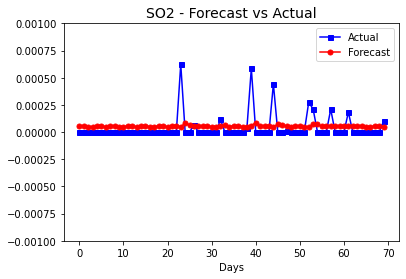

In [8]:
plt.title(product_name.upper() + " - Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bs-", markersize=5, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "ro-", markersize=5, label="Forecast")
#plt.legend(loc="upper left")
plt.legend(loc="best")
plt.xlabel("Days")
plt.ylim([-0.001,0.001])
plt.show()

In [9]:
with tf1.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models/rnn/"+dataset_name+"/"+product_name+"/"+product_name+".ckpt")
    predict=sess.run(outputs, feed_dict={X: 
    [[[1.4241785e-05],
  [11.6847160e-05],
  [2.0498410e-05],
  [1.8807594e-05],
  [1.1699350e-05],
  [1.1699350e-05],
  [1.1699350e-05]]]}) #nhập num_periods ngày quá khứ, dự đoán num_periods ngày tương lai
print(predict)

INFO:tensorflow:Restoring parameters from models/rnn/q1/so2/so2.ckpt
[[[5.7824887e-05]
  [6.5829721e-05]
  [5.1349984e-05]
  [5.0813775e-05]
  [5.8708945e-05]
  [5.6995195e-05]
  [5.0229602e-05]]]


In [10]:
print(y_pred) #base on X_test

[[[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [5.7779369e-05]
  [5.6295423e-05]
  [4.9452297e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [5.7779369e-05]
  [5.6295423e-05]
  [4.9452297e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [5.7779369e-05]
  [5.6295423e-05]
  [4.9452297e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [8.2083163e-05]
  [6.5178960e-05]
  [5.5831275e-05]
  [5.3531374e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [5.7779369e-05]
  [6.2349718e-05]
  [5.0835195e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [5.9677637e-05]
  [8.7124878e-05]
  [5.6367950e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [7.2648982e-05]
  [6.3024345e-05]
  [5.5966782e-05]
  [5.0410512e-05]]

 [[5.7601952e-05]
  [5.9741316e-05]
  [4.8905960e-05]
  [4.9687573e-05]
  [7.1931165e-05]
  [7.0611946e-